In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# read training data
train_data=[]
with open('train.csv', 'r') as f:
    for line in f:
        terms = line.strip().split(',')
        train_data.append(terms)

In [3]:
# read training data
test_data=[]
with open('test.csv', 'r') as f:
    for line in f:
        terms = line.strip().split(',')
        test_data.append(terms)

In [4]:
# X_train, y_train
train_data = np.array( train_data,dtype='float64')
test_data = np.array(test_data,dtype='float64')

X_train = np.append(np.ones((train_data.shape[0], 1),dtype='float64'), train_data[:, 0:7], 1)
y_train = train_data[:,7].flatten()

#X_test, y_test
X_test = np.append(np.ones((test_data.shape[0], 1),dtype='float64'), test_data[:, 0:7], 1)
y_test = test_data[:,7].flatten()


In [18]:
def SGD(X, y, lr, tolerance, max_iter):
    
    w = np.zeros(X.shape[1])
    Loss = []

    for t in range(max_iter):
        idx = random.randrange(X.shape[0])
        X1=X[idx]
        y1=y[idx]

        grad = -(y1 - np.dot(w, X1)) * X1

        w -= lr * grad
        loss = 0
        for i in range(len(y)):
            loss += (y[i] - np.dot(w, X[i]))**2
        loss /=2
        #print(loss)
        Loss.append(loss)

        if np.linalg.norm(lr * grad) < tolerance:
            print('SGD converged on iter ', t, 'loss: ', loss)
            break

    return w, Loss

In [27]:
SGD(X_train, y_train,lr=0.013,tolerance=1e-6,max_iter=1000)

(array([-0.00998144, -0.13615732, -0.19136868, -0.17857303,  0.48318645,
         0.04264286,  0.2014137 ,  0.07592694]),
 [22.67987394372135,
  22.624904137673138,
  21.597817495518655,
  21.579826336229065,
  21.768086688697526,
  22.086897404360688,
  22.15618928792597,
  22.340561803853696,
  22.331424524071164,
  22.155248707138263,
  21.12407510361071,
  21.553834498107015,
  21.528579722352422,
  21.400309584752097,
  21.559067638497975,
  21.813036018539563,
  21.50984504171538,
  21.50444668814217,
  20.77512096202413,
  20.79498811125739,
  20.436918811484293,
  20.434978278362983,
  20.29039727001841,
  20.44796631037101,
  20.45454347109517,
  20.356404597428405,
  20.397753095265106,
  20.35304720974096,
  20.148978440076647,
  20.197181247268677,
  19.59430227976782,
  19.94681910524656,
  19.66514124817033,
  18.98818106536758,
  18.973594725837263,
  18.897365695399873,
  18.770479262037423,
  18.7217555570361,
  18.32915204541111,
  18.5516741497841,
  18.4804503913141

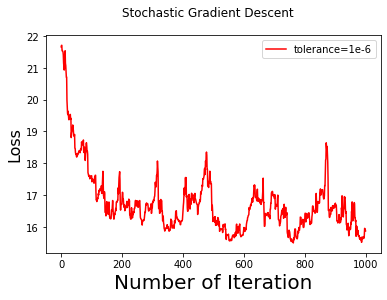

In [26]:
[w,Loss]=SGD(X_train, y_train,lr=0.013,tolerance=1e-6,max_iter=1000)
fig = plt.figure()
fig.suptitle('Stochastic Gradient Descent')
plt.xlabel('Number of Iteration', fontsize=20)
plt.ylabel('Loss', fontsize=16)
plt.plot(Loss, 'r') 
plt.legend(['tolerance=1e-6'])
fig.savefig('SGD_new.png')